# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.</br>
            5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking
of financial institutions across regions.</br>
            5.3 Propose continuous monitoring of market share concentration to identify growth opportunities
for mid-tier banks.</br>
            5.4  Identify potential regions or banking segments for expansion by analysing gaps between tiers
of banks and regional trends.</br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [5]:
# # Install the required libraries
# !pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [6]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull

In [7]:
# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

print("Spark session initialized successfully.")

Spark session initialized successfully.


#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [8]:
# Initialize Spark session

# URL of the Wikipedia page
url1 = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"
url2 = "https://web.archive.org/web/20220802232403/https://en.wikipedia.org/wiki/List_of_largest_banks"

# Use pandas to read all HTML tables from the page
print("Reading tables from Wikipedia page 1...\n")
tables = pd.read_html(url1)

# Load the correct table (Table 1 and 2)
print(f"Number of tables found: {len(tables)}")

# Select the correct tables (index 1 and 2)
banks_df = tables[1]
total_assets_2022_df = tables[2]

print("\nPreview of extracted raw pandas DataFrame:")
print("banks_df\n")
print(banks_df.head())
print("\ntotal_assets_2022_df\n")
print(total_assets_2022_df.head())

# Rename columns for consistency
banks_df.columns = ["Rank", "Bank Name", "Market Cap (USD Billion)"]

# Initialize Spark Session if not already
spark = SparkSession.builder.appName("BankingDataAnalysis").getOrCreate()

# Convert pandas DataFrame to PySpark DataFrame
banks_spark_df = spark.createDataFrame(banks_df)

# Cast types
banks_spark_df = (
    banks_spark_df
    .withColumn("Rank", col("Rank").cast("int"))
    .withColumn("Market Cap (USD Billion)", col("Market Cap (USD Billion)").cast("double"))
)

# Show the first few rows of the PySpark DataFrame
print("\nDisplaying the prepared Spark DataFrame:")
banks_spark_df.show(truncate=False)

# Print the schema of the DataFrame
print("\nDataFrame Schema:")
banks_spark_df.printSchema()

# Use pandas to read all HTML tables from page 2
print("Reading tables from Wikipedia page 2...\n")
tables = pd.read_html(url2)

# Load the correct table (Table 1)
print(f"Number of tables found: {len(tables)}")

# Select the correct tables (index 1)
total_assets_2021_df = tables[2]

print("\nPreview of extracted raw pandas DataFrame:")
print("\ntotal_assets_2021_df\n")
print(total_assets_2021_df)



Reading tables from Wikipedia page 1...

Number of tables found: 4

Preview of extracted raw pandas DataFrame:
banks_df

   Rank                                Bank name  Market cap (US$ billion)
0     1                           JPMorgan Chase                    432.92
1     2                          Bank of America                    231.52
2     3  Industrial and Commercial Bank of China                    194.56
3     4               Agricultural Bank of China                    160.68
4     5                                HDFC Bank                    157.91

total_assets_2022_df

   Rank                                        Bank name  \
0     1  Industrial and Commercial Bank of China Limited   
1     2                          China Construction Bank   
2     3                       Agricultural Bank of China   
3     4                                    Bank of China   
4     5                                   JPMorgan Chase   

   Total assets (2022) (US$ billion)  
0     

Load the data for exchange rates

In [9]:
# Load the exchange rate data
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Exchange Rate Data (CSV)
exchange_rate_path = "/content/drive/MyDrive/exchange_rate(in).csv"

# Show the first few rows of the exchange rate data to verify
# Load into pandas
exchange_rate_df = pd.read_csv(exchange_rate_path)

print("\nPreview of Exchange Rate Data (Pandas):\n")
print(exchange_rate_df.head())


# Convert to PySpark DataFrame
exchange_rate_spark_df = spark.createDataFrame(exchange_rate_df)

print("\nDisplaying Exchange Rate Spark DataFrame:\n")
exchange_rate_spark_df.show(truncate=False)

# Print schema
exchange_rate_spark_df.printSchema()


Mounted at /content/drive

Preview of Exchange Rate Data (Pandas):

  Currency   Rate
0      EUR   0.93
1      GBP   0.80
2      INR  82.95

Displaying Exchange Rate Spark DataFrame:

+--------+-----+
|Currency|Rate |
+--------+-----+
|EUR     |0.93 |
|GBP     |0.8  |
|INR     |82.95|
+--------+-----+

root
 |-- Currency: string (nullable = true)
 |-- Rate: double (nullable = true)



#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [10]:
# Print the schema to check data types
print("Schema before cleaning:")
banks_spark_df.printSchema()

Schema before cleaning:
root
 |-- Rank: integer (nullable = true)
 |-- Bank Name: string (nullable = true)
 |-- Market Cap (USD Billion): double (nullable = true)



In [11]:
# Check for missing values
print("Checking for missing values...")
missing_counts = banks_spark_df.select([
    count(when(isnull(c) | (col(c) == ""), c)).alias(c)
    for c in banks_spark_df.columns
])

missing_counts.show()

Checking for missing values...
+----+---------+------------------------+
|Rank|Bank Name|Market Cap (USD Billion)|
+----+---------+------------------------+
|   0|        0|                       0|
+----+---------+------------------------+



In [12]:
# Drop rows with missing values
banks_clean_df = banks_spark_df.dropna()

print("After dropping missing values:")
banks_clean_df.show(10, truncate=False)

# Verify no missing values remain
print("\nRe-checking for missing values...")
missing_counts_after = banks_clean_df.select([
    count(when(isnull(c) | (col(c) == ""), c)).alias(c)
    for c in banks_clean_df.columns
])

missing_counts_after.show()

After dropping missing values:
+----+---------------------------------------+------------------------+
|Rank|Bank Name                              |Market Cap (USD Billion)|
+----+---------------------------------------+------------------------+
|1   |JPMorgan Chase                         |432.92                  |
|2   |Bank of America                        |231.52                  |
|3   |Industrial and Commercial Bank of China|194.56                  |
|4   |Agricultural Bank of China             |160.68                  |
|5   |HDFC Bank                              |157.91                  |
|6   |Wells Fargo                            |155.87                  |
|7   |HSBC Holdings PLC                      |148.9                   |
|8   |Morgan Stanley                         |140.83                  |
|9   |China Construction Bank                |139.82                  |
|10  |Bank of China                          |136.81                  |
+----+---------------------------

##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [13]:
# Count the total number of rows
total_rows = banks_clean_df.count()
print(f"Total number of rows in dataset: {total_rows}")

# Check if there are duplicates
duplicate_rows = banks_clean_df.count() - banks_clean_df.dropDuplicates().count()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("\nRemoving duplicate rows...")
    banks_clean_df = banks_clean_df.dropDuplicates()

# Confirm row count after removing duplicates
final_rows = banks_clean_df.count()
print(f"\nFinal number of rows after removing duplicates: {final_rows}")

# Show final cleaned data sample
banks_clean_df.show(5, truncate=False)

# Replace "Industrial and Commercial Bank of China Limited" with "Industrial and Commercial Bank of China"
total_assets_2021_df["Bank name"] = total_assets_2021_df["Bank name"].replace(
    "Industrial and Commercial Bank of China Limited", "Industrial and Commercial Bank of China"
)
total_assets_2022_df["Bank name"] = total_assets_2022_df["Bank name"].replace(
    "Industrial and Commercial Bank of China Limited", "Industrial and Commercial Bank of China"
)

def clean_asset(x):
    if pd.isnull(x):
        return np.nan
    # Remove footnotes like [4], then commas, then strip spaces
    x = str(x)
    x = re.sub(r'\[.*?\]', '', x)  # Remove [anything]
    x = x.replace(',', '')         # Remove commas
    x = x.strip()
    try:
        return float(x)
    except:
        return np.nan

import numpy as np
import re

total_assets_2021_df["Total assets (2021) (US$ billion)"] = total_assets_2021_df["Total assets (2021) (US$ billion)"].apply(clean_asset)
total_assets_2022_df["Total assets (2022) (US$ billion)"] = total_assets_2022_df["Total assets (2022) (US$ billion)"].apply(clean_asset)

# Identify the row for JPMorgan Chase and divide its 2021 assets by 10
#mask = total_assets_2021_df["Bank name"].str.contains("JPMorgan Chase", case=False, na=False)
#total_assets_2021_df.loc[mask, "Total assets (2021) (US$ billion)"] *= 10


print(total_assets_2021_df.head(5))
print(total_assets_2022_df.head(5))

Total number of rows in dataset: 10

Number of duplicate rows: 0

Final number of rows after removing duplicates: 10
+----+---------------------------------------+------------------------+
|Rank|Bank Name                              |Market Cap (USD Billion)|
+----+---------------------------------------+------------------------+
|1   |JPMorgan Chase                         |432.92                  |
|2   |Bank of America                        |231.52                  |
|3   |Industrial and Commercial Bank of China|194.56                  |
|4   |Agricultural Bank of China             |160.68                  |
|5   |HDFC Bank                              |157.91                  |
+----+---------------------------------------+------------------------+
only showing top 5 rows

   Rank                                Bank name  \
0     1  Industrial and Commercial Bank of China   
1     2                  China Construction Bank   
2     3               Agricultural Bank of China   
3 

##**2.2 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [14]:
# Write code for outlier analysis
from pyspark.sql.functions import expr

# Compute Q1, Q3, and IQR for Market Cap
quantiles = banks_clean_df.approxQuantile("Market Cap (USD Billion)", [0.25, 0.75], 0.05)
Q1, Q3 = quantiles
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"\nLower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Flag outliers
outliers_df = banks_clean_df.filter(
    (col("Market Cap (USD Billion)") < lower_bound) |
    (col("Market Cap (USD Billion)") > upper_bound)
)

print("\nPotential Outliers in Market Cap:")
outliers_df.show()

# Path in your Google Drive
output_path = "/content/drive/MyDrive/cleaned_banks_data.csv"

# Save as single CSV file with header
banks_clean_df.coalesce(1).write.mode("overwrite").option("header", "true").csv("/content/cleaned_banks_temp")

# Move the CSV file from temp folder to your Drive with a clean filename
import shutil, os

temp_folder = "/content/cleaned_banks_temp"
for file in os.listdir(temp_folder):
    if file.endswith(".csv"):
        shutil.move(os.path.join(temp_folder, file), output_path)

# Remove temp folder
shutil.rmtree(temp_folder)

print(f"\nCleaned dataset saved to: {output_path}")

Q1: 140.83, Q3: 194.56, IQR: 53.72999999999999

Lower Bound: 60.23500000000003, Upper Bound: 275.155

Potential Outliers in Market Cap:
+----+--------------+------------------------+
|Rank|     Bank Name|Market Cap (USD Billion)|
+----+--------------+------------------------+
|   1|JPMorgan Chase|                  432.92|
+----+--------------+------------------------+


Cleaned dataset saved to: /content/drive/MyDrive/cleaned_banks_data.csv


Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [15]:
# Convert PySpark DataFrame to Pandas DataFrame
clean_df = banks_clean_df.toPandas()

print(clean_df)

   Rank                                Bank Name  Market Cap (USD Billion)
0     1                           JPMorgan Chase                    432.92
1     2                          Bank of America                    231.52
2     3  Industrial and Commercial Bank of China                    194.56
3     4               Agricultural Bank of China                    160.68
4     5                                HDFC Bank                    157.91
5     6                              Wells Fargo                    155.87
6     7                        HSBC Holdings PLC                    148.90
7     8                           Morgan Stanley                    140.83
8     9                  China Construction Bank                    139.82
9    10                            Bank of China                    136.81


##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

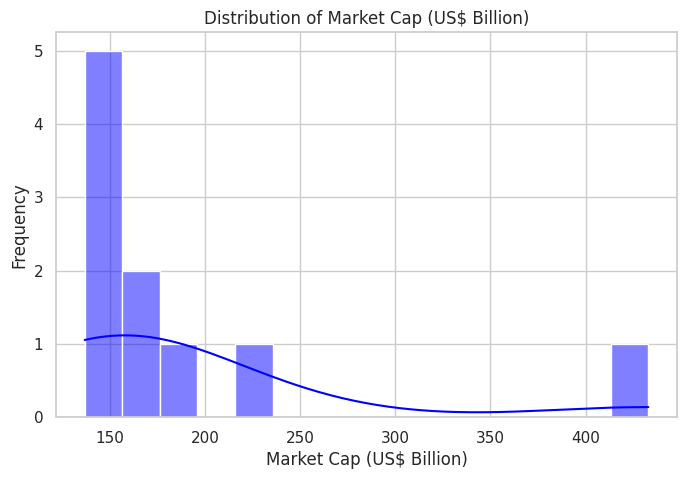

In [16]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of market cap
plt.figure(figsize=(8, 5))
sns.histplot(clean_df["Market Cap (USD Billion)"], bins=15, kde=True, color="blue")
plt.title("Distribution of Market Cap (US$ Billion)")
plt.xlabel("Market Cap (US$ Billion)")
plt.ylabel("Frequency")
plt.show()

##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

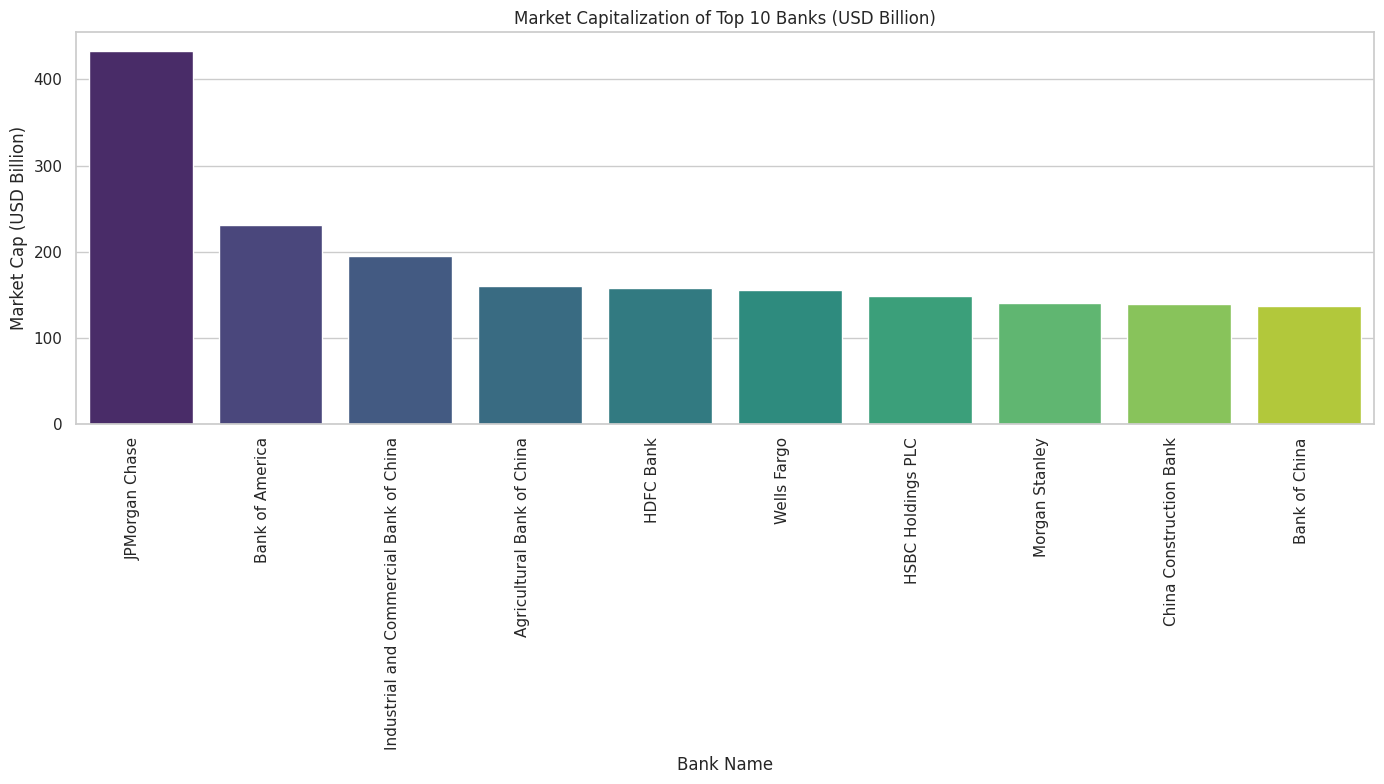

In [17]:
# Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order
sorted_df = clean_df.sort_values(by='Market Cap (USD Billion)', ascending=False)
# Plot the top 10 banks by market cap

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(data=sorted_df, x="Bank Name", y="Market Cap (USD Billion)", hue="Bank Name", palette="viridis", legend=False)
plt.title("Market Capitalization of Top 10 Banks (USD Billion)")
plt.xlabel("Bank Name")
plt.ylabel("Market Cap (USD Billion)")
plt.xticks(rotation=90, ha="right") # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

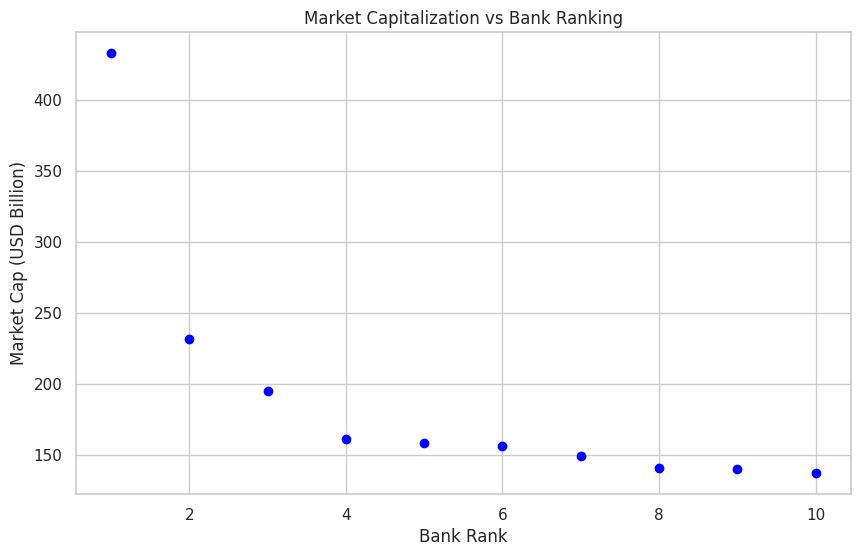

In [18]:
# Market Cap vs Rank

# Plot market cap vs rank
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['Rank'], clean_df['Market Cap (USD Billion)'], color='blue')
plt.title('Market Capitalization vs Bank Ranking')
plt.xlabel('Bank Rank')
plt.ylabel('Market Cap (USD Billion)')
plt.grid(True)
plt.show()

##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

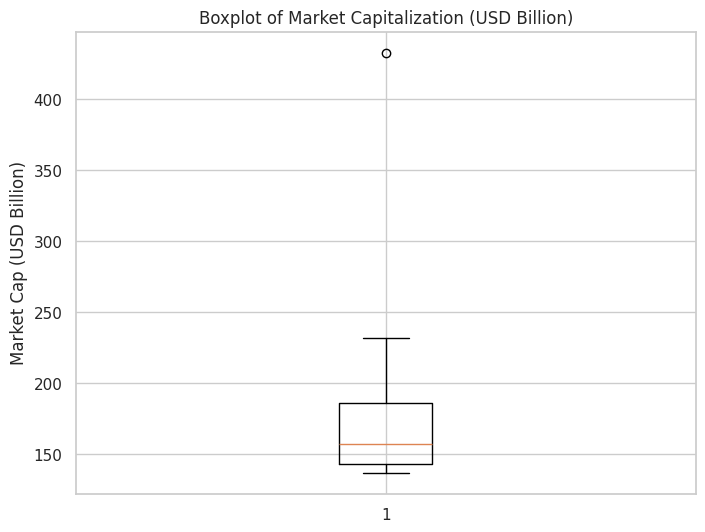

In [19]:
# Boxplot of Market Cap
# To show the spread and outliers in the market capitalization data.

# Plot a boxplot of market cap
plt.figure(figsize=(8, 6))
plt.boxplot(clean_df['Market Cap (USD Billion)'], vert=True)
plt.title('Boxplot of Market Capitalization (USD Billion)')
plt.ylabel('Market Cap (USD Billion)')
plt.grid(True)
plt.show()

##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

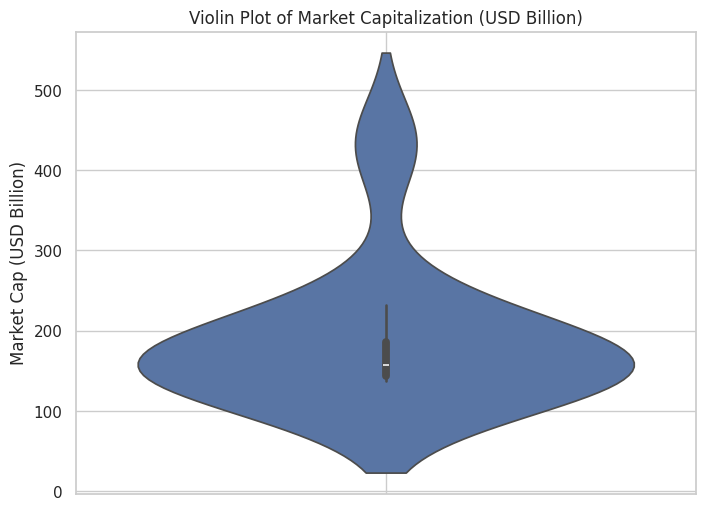

In [20]:
# Market Cap Distribution by Quartile
plt.figure(figsize=(8, 6))
sns.violinplot(y=clean_df['Market Cap (USD Billion)'])
plt.title('Violin Plot of Market Capitalization (USD Billion)')
plt.ylabel('Market Cap (USD Billion)')
plt.grid(True)
plt.show()

##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

Top-10 cumulative market share: 100.00%


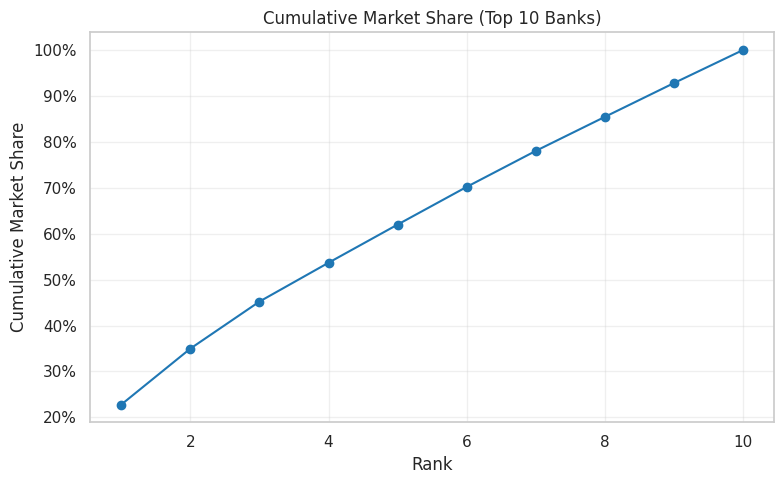

In [21]:
# Cumulative Market Share

df = clean_df.copy()

# Define the denominator:
total_market_cap = df['Market Cap (USD Billion)'].sum()

# Individual market share (%)
df['Market Share (%)'] = df['Market Cap (USD Billion)'] / total_market_cap * 100

# Cumulative market share (%), leveraging the pre-sorted Rank
df['Cumulative Market Share (%)'] = df['Market Share (%)'].cumsum()

# Top-10 cumulative market share value
top10_cumulative_share = df['Cumulative Market Share (%)'].iloc[-1]
print(f"Top-10 cumulative market share: {top10_cumulative_share:.2f}%")


# Plot
plt.figure(figsize=(8,5))
plt.plot(df['Rank'], df['Cumulative Market Share (%)'], marker='o', color='tab:blue')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.title('Cumulative Market Share (Top 10 Banks)')
plt.xlabel('Rank')
plt.ylabel('Cumulative Market Share')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

MktCap Bin
<100B       0
100–200B    8
200–400B    1
400–600B    1
≥600B       0
Name: count, dtype: int64


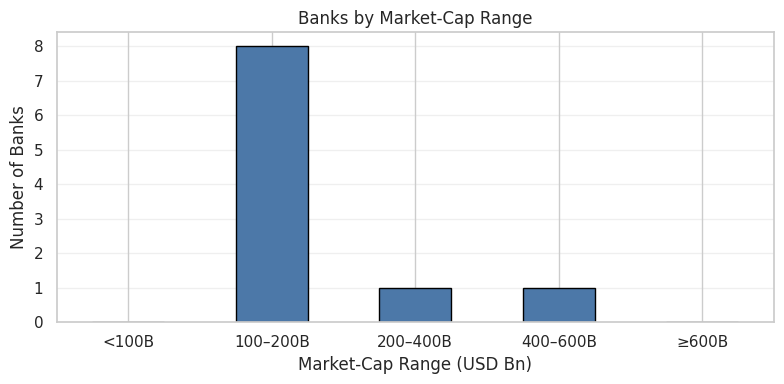

In [22]:
# Market Cap Range Distribution
# Create market cap ranges
df = clean_df.copy()

# Define bins in USD Billions (adjust as needed)
bins = [-float('inf'), 100, 200, 400, 600, float('inf')]
labels = ['<100B', '100–200B', '200–400B', '400–600B', '≥600B']

# Assign category for each bank
df['MktCap Bin'] = pd.cut(df['Market Cap (USD Billion)'], bins=bins, labels=labels, right=False, include_lowest=True)

# Distribution by count
counts = df['MktCap Bin'].value_counts().reindex(labels, fill_value=0)

print(counts)

# Plot
# Count-based bar chart
ax = counts.plot(kind='bar', color='#4C78A8', edgecolor='black', rot=0, figsize=(8,4))
ax.set_title('Banks by Market-Cap Range')
ax.set_xlabel('Market-Cap Range (USD Bn)')
ax.set_ylabel('Number of Banks')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

   Rank                                Bank Name  Market Cap (USD Billion)  \
0     1                           JPMorgan Chase                    432.92   
1     2                          Bank of America                    231.52   
2     3  Industrial and Commercial Bank of China                    194.56   
3     4               Agricultural Bank of China                    160.68   
4     5                                HDFC Bank                    157.91   
5     6                              Wells Fargo                    155.87   
6     7                        HSBC Holdings PLC                    148.90   
7     8                           Morgan Stanley                    140.83   
8     9                  China Construction Bank                    139.82   
9    10                            Bank of China                    136.81   

   Market Share (%)  
0         22.787422  
1         12.186418  
2         10.240970  
3          8.457643  
4          8.311840  
5        

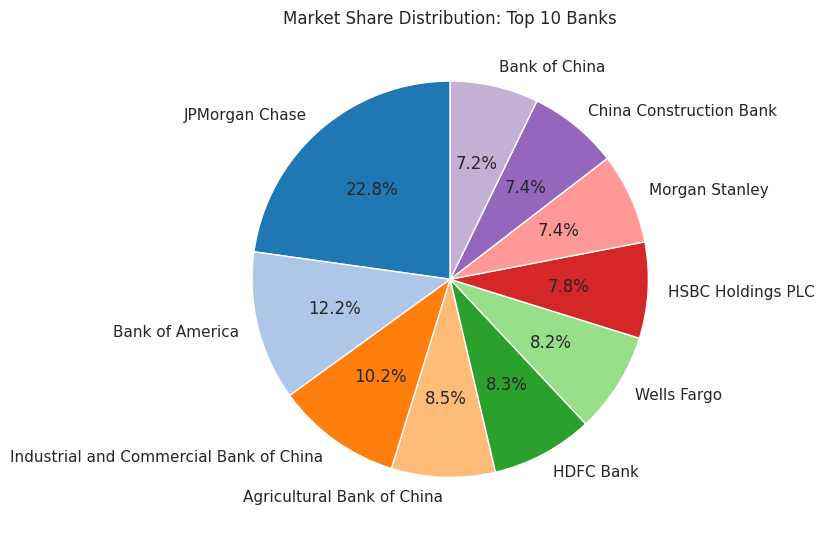

In [23]:
# Top 10 Banks Market Share
# Calculate market share percentage for top 10 banks

total_cap = clean_df['Market Cap (USD Billion)'].sum()

# Compute market share (%) for each bank
clean_df['Market Share (%)'] = clean_df['Market Cap (USD Billion)'] / total_cap * 100

print(clean_df)

# Plot
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors  # 20 distinct colors, enough for 10 banks
wedges, texts, autotexts = plt.pie(
    clean_df['Market Share (%)'],
    labels=clean_df['Bank Name'],
    autopct='%1.1f%%',        # show percent with one decimal place
    startangle=90,            # start at top
    colors=colors,
    counterclock=True
)

plt.title('Market Share Distribution: Top 10 Banks')
plt.tight_layout()
plt.show()

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [24]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [25]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [26]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window

# First, let's rename your columns to match our queries (if needed)

# Create window specifications


##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [27]:
# Query: Advanced Market Cap Analysis with Growth Metrics
# Sort descending by market cap
df_sorted = clean_df.sort_values("Market Cap (USD Billion)", ascending=False).reset_index(drop=True)

# Assign global rank starting at 1
df_sorted["Global_rank"] = df_sorted.index + 1

total_market_cap = df_sorted["Market Cap (USD Billion)"].sum()

# Cumulative sum of market caps
df_sorted["Cumulative_market_cap"] = df_sorted["Market Cap (USD Billion)"].cumsum()

# Market share percentage
df_sorted["Market_share_pct"] = ((df_sorted["Market Cap (USD Billion)"] / total_market_cap) * 100).round(2)

# Gap from leader = Market cap of bank minus leader market cap
leader_cap = df_sorted.loc[0, "Market Cap (USD Billion)"]
df_sorted["Gap_from_leader"] = df_sorted["Market Cap (USD Billion)"] - leader_cap

# Select relevant columns and rename
market_analysis = df_sorted[[
    "Bank Name", "Market Cap (USD Billion)", "Global_rank",
    "Market_share_pct", "Cumulative_market_cap", "Gap_from_leader"
]]


# Display output
print("Top Banks by Market Cap with Advanced Metrics:")
print(market_analysis.to_string(index=False))


Top Banks by Market Cap with Advanced Metrics:
                              Bank Name  Market Cap (USD Billion)  Global_rank  Market_share_pct  Cumulative_market_cap  Gap_from_leader
                         JPMorgan Chase                    432.92            1             22.79                 432.92             0.00
                        Bank of America                    231.52            2             12.19                 664.44          -201.40
Industrial and Commercial Bank of China                    194.56            3             10.24                 859.00          -238.36
             Agricultural Bank of China                    160.68            4              8.46                1019.68          -272.24
                              HDFC Bank                    157.91            5              8.31                1177.59          -275.01
                            Wells Fargo                    155.87            6              8.20                1333.46          -2

##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

Cap-only concentration summary
Total Market Cap (USD bn): 1899.82
CR3: 0.4521  |  CR5: 0.6198  |  CR10: 1.0000
HHI (0–1): 0.1203  |  HHI (0–10,000): 1203.0  |  Band: Low (competitive)
Effective Number of Firms: 8.31


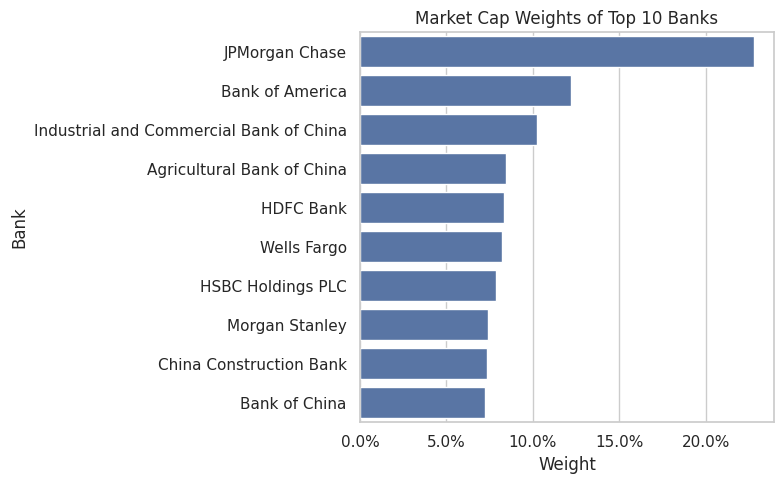

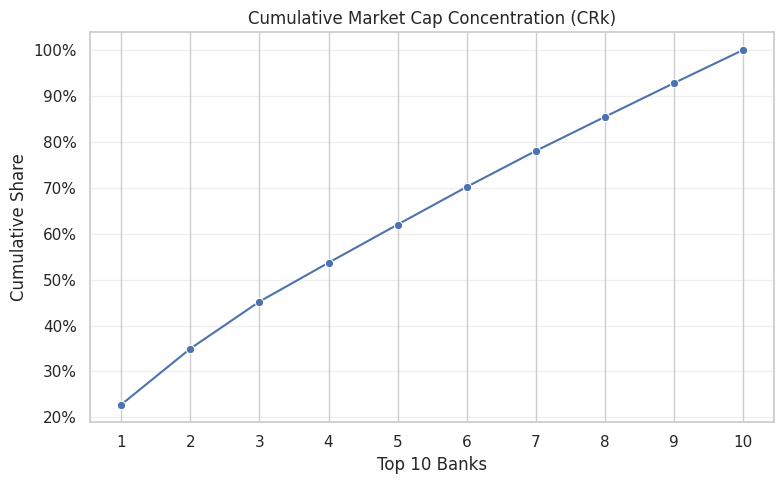

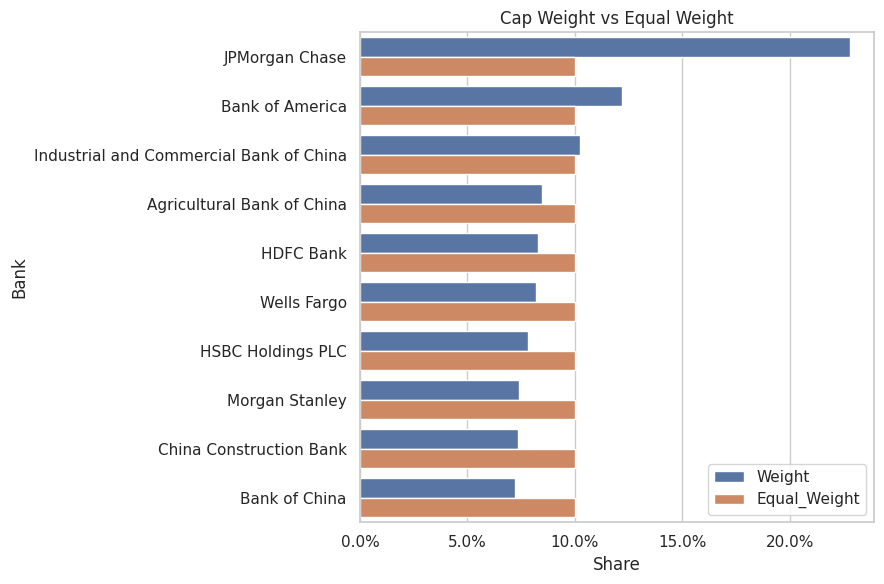

In [28]:
# Market Concentration Analysis

# Weights from market caps
clean_df["Weight"] = clean_df["Market Cap (USD Billion)"] / total_cap

# Concentration ratios
cr3 = clean_df["Weight"].head(3).sum()
cr5 = clean_df["Weight"].head(5).sum()
cr10 = clean_df["Weight"].head(10).sum()

# HHI (0–1 basis) and DOJ scale (0–10,000)
hhi_0_1 = float((clean_df["Weight"] ** 2).sum())
hhi_0_10000 = hhi_0_1 * 10000.0

# Effective number of firms (ENF)
effective_n = 1.0 / hhi_0_1 if hhi_0_1 > 0 else float("inf")

# Simple interpretation band (DOJ/FTC practice)
if hhi_0_10000 < 1500:
    hhi_band = "Low (competitive)"
elif hhi_0_10000 < 2500:
    hhi_band = "Moderate"
else:
    hhi_band = "High"

# Print summary
print("Cap-only concentration summary")
print(f"Total Market Cap (USD bn): {total_cap:.2f}")
print(f"CR3: {cr3:.4f}  |  CR5: {cr5:.4f}  |  CR10: {cr10:.4f}")
print(f"HHI (0–1): {hhi_0_1:.4f}  |  HHI (0–10,000): {hhi_0_10000:.1f}  |  Band: {hhi_band}")
print(f"Effective Number of Firms: {effective_n:.2f}")

# Plot: weights bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Weight", y="Bank Name", data=clean_df, orient="h", color="#4C72B0")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Market Cap Weights of Top 10 Banks")
plt.xlabel("Weight")
plt.ylabel("Bank")
plt.tight_layout()
plt.show()

# Plot: cumulative concentration (CRk curve)
clean_df["Cumulative"] = clean_df["Weight"].cumsum()
plt.figure(figsize=(8, 5))
sns.lineplot(x=clean_df.index + 1, y="Cumulative", data=clean_df, marker="o")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(range(1, len(clean_df) + 1))
plt.title("Cumulative Market Cap Concentration (CRk)")
plt.xlabel("Top 10 Banks")
plt.ylabel("Cumulative Share")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Plot: equal weight vs cap weight
equal_w = 1.0 / len(clean_df)
tmp = clean_df[["Bank Name", "Weight"]].copy()
tmp["Equal_Weight"] = equal_w
weights_melt = pd.melt(tmp, id_vars=["Bank Name"], var_name="Type", value_name="Share")

plt.figure(figsize=(9, 6))
sns.barplot(x="Share", y="Bank Name", hue="Type", data=weights_melt, orient="h")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Cap Weight vs Equal Weight")
plt.xlabel("Share")
plt.ylabel("Bank")
plt.legend(title="")
plt.tight_layout()
plt.show()


##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [29]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
val_col = "Market Cap (USD Billion)"

# Core quartiles
q1, q2, q3 = clean_df[val_col].quantile([0.25, 0.50, 0.75]).values
iqr = q3 - q1
print(f"Q1: {q1:.4f}  Q2/Median: {q2:.4f}  Q3: {q3:.4f}  IQR: {iqr:.4f}")

# Quartile labels via qcut; capture bin edges
quartiles, bins = pd.qcut(
    clean_df[val_col],
    q=4,
    labels=False,
    retbins=True,
    duplicates="drop"
)

clean_df["Quartile"] = quartiles + 1  # 1..4

# Human-readable quartile ranges
bin_ranges = pd.IntervalIndex.from_breaks(bins)
print("Quartile bin edges (inclusive-exclusive intervals):")
for i, interval in enumerate(bin_ranges, start=1):
    print(f"Q{i}: {interval}")


quartile_summary = (
    clean_df.groupby("Quartile", dropna=False)
    .agg(
        Num_Banks=("Bank Name", "count"),
        Min_Cap_USD_Bn=(val_col, "min"),
        Avg_Cap_USD_Bn=(val_col, "mean"),
        Max_Cap_USD_Bn=(val_col, "max"),
        Total_Cap_USD_Bn=(val_col, "sum"),
    )
    .reset_index()
    .sort_values("Quartile")
)

total_cap = clean_df[val_col].sum()
quartile_summary["Share_of_Total"] = quartile_summary["Total_Cap_USD_Bn"].div(total_cap)
quartile_summary["Share_of_Total_pct"] = quartile_summary["Share_of_Total"].mul(100).round(2)
print(quartile_summary)


Q1: 142.8475  Q2/Median: 156.8900  Q3: 186.0900  IQR: 43.2425
Quartile bin edges (inclusive-exclusive intervals):
Q1: (136.81, 142.84750000000003]
Q2: (142.84750000000003, 156.89]
Q3: (156.89, 186.09]
Q4: (186.09, 432.92]
   Quartile  Num_Banks  Min_Cap_USD_Bn  Avg_Cap_USD_Bn  Max_Cap_USD_Bn  \
0         1          3          136.81      139.153333          140.83   
1         2          2          148.90      152.385000          155.87   
2         3          2          157.91      159.295000          160.68   
3         4          3          194.56      286.333333          432.92   

   Total_Cap_USD_Bn  Share_of_Total  Share_of_Total_pct  
0            417.46        0.219737               21.97  
1            304.77        0.160420               16.04  
2            318.59        0.167695               16.77  
3            859.00        0.452148               45.21  


##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

Absolute size classification summary:
             Size_Bucket  Num_Banks  Total_Cap_USD_Bn  Avg_Cap_USD_Bn  \
0          Mid (130–140)          2            276.63         138.315   
1    Upper Mid (140–150)          2            289.73         144.865   
2        Large (150–200)          4            669.02         167.255   
3  Upper Large (200–400)          1            231.52         231.520   
4            Mega (≥400)          1            432.92         432.920   

   Max_Cap_USD_Bn  Share_of_Total  
0          139.82        0.145609  
1          148.90        0.152504  
2          194.56        0.352149  
3          231.52        0.121864  
4          432.92        0.227874  

Relative quartile classification summary:
        Quartile  Num_Banks  Total_Cap_USD_Bn  Avg_Cap_USD_Bn  Max_Cap_USD_Bn  \
0  Q1 (Smallest)          3            417.46      139.153333          140.83   
1             Q2          2            304.77      152.385000          155.87   
2             Q3     

/tmp/ipython-input-2358945335.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby("Size_Bucket")
/tmp/ipython-input-2358945335.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby("Quartile")


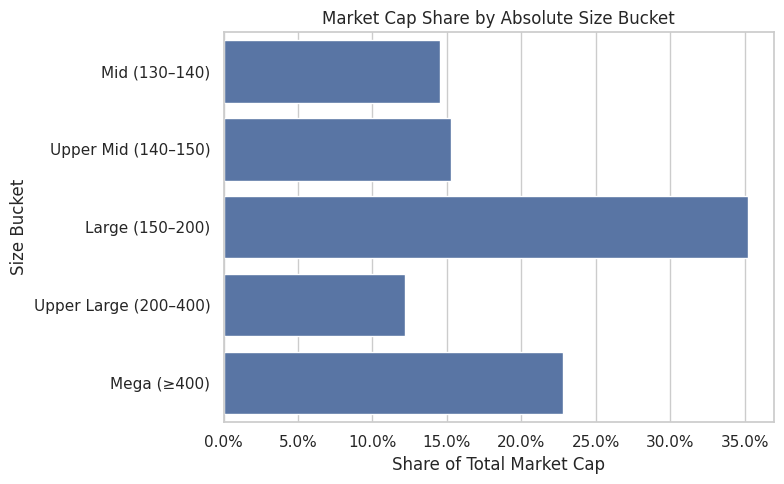

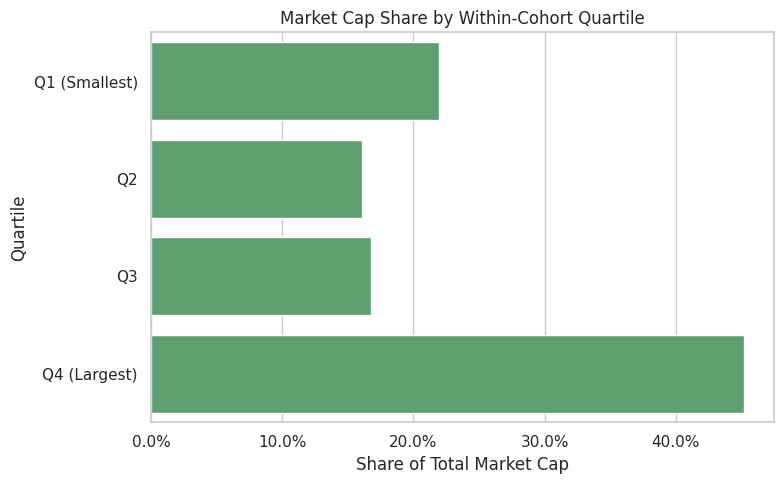

In [30]:
# Comparative Size Analysis

# Absolute size classification (USD billions)
def classify_size(usd_bn):
    if usd_bn >= 400.0:
        return "Mega (≥400)"
    elif usd_bn >= 200.0:
        return "Upper Large (200–400)"
    elif usd_bn >= 150.0:
        return "Large (150–200)"
    elif usd_bn >= 140.0:
        return "Upper Mid (140–150)"
    elif usd_bn >= 130.0:
        return "Mid (130–140)"
    else:
        return "Below Cohort Floor"

clean_df["Size_Bucket"] = clean_df[val_col].apply(classify_size)

# Enforce display order for size buckets
order = ["Mid (130–140)", "Upper Mid (140–150)", "Large (150–200)", "Upper Large (200–400)", "Mega (≥400)"]
clean_df["Size_Bucket"] = pd.Categorical(clean_df["Size_Bucket"], categories=order, ordered=True)

size_summary = (
    clean_df.groupby("Size_Bucket")
    .agg(
        Num_Banks=("Bank Name", "count"),
        Total_Cap_USD_Bn=(val_col, "sum"),
        Avg_Cap_USD_Bn=(val_col, "mean"),
        Max_Cap_USD_Bn=(val_col, "max"),
    )
    .reset_index()
    .sort_values("Size_Bucket")  # respects the Categorical order defined above
)


size_summary["Share_of_Total"] = size_summary["Total_Cap_USD_Bn"] / clean_df[val_col].sum()

print("Absolute size classification summary:")
print(size_summary)

# Relative (within-top-10) quartile classification
clean_df["Quartile"] = pd.qcut(
    clean_df[val_col],
    q=4,
    labels=["Q1 (Smallest)", "Q2", "Q3", "Q4 (Largest)"],
    duplicates="drop"
)

quartile_summary = (
    clean_df.groupby("Quartile")
    .agg(
        Num_Banks=("Bank Name", "count"),
        Total_Cap_USD_Bn=(val_col, "sum"),
        Avg_Cap_USD_Bn=(val_col, "mean"),
        Max_Cap_USD_Bn=(val_col, "max"),
    )
    .reset_index()
)

quartile_summary["Share_of_Total"] = quartile_summary["Total_Cap_USD_Bn"] / clean_df[val_col].sum()

print("\nRelative quartile classification summary:")
print(quartile_summary)

# Optional visuals
plt.figure(figsize=(8,5))
sns.barplot(x="Share_of_Total", y="Size_Bucket", data=size_summary, orient="h", color="#4C72B0")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Market Cap Share by Absolute Size Bucket")
plt.xlabel("Share of Total Market Cap")
plt.ylabel("Size Bucket")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Share_of_Total", y="Quartile", data=quartile_summary, orient="h", color="#55A868")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Market Cap Share by Within-Cohort Quartile")
plt.xlabel("Share of Total Market Cap")
plt.ylabel("Quartile")
plt.tight_layout()
plt.show()


##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [31]:
# Growth and Gap Analysis

# Step 1: Clean and prepare bank name keys for joining - make consistent lowercase stripped strings
def clean_bank_name(name):
    return name.lower().strip().replace(".", "").replace(",", "").replace("[4]", "")

clean_df["clean_name"] = clean_df["Bank Name"].apply(clean_bank_name)
total_assets_2022_df["clean_name"] = total_assets_2022_df["Bank name"].apply(clean_bank_name)
total_assets_2021_df["clean_name"] = total_assets_2021_df["Bank name"].apply(clean_bank_name)

# Step 2: Calculate asset growth rates between 2021 and 2022
# Convert assets columns to numeric, removing commas/footnotes if needed
total_assets_2021_df["Total assets (2021) (US$ billion)"] = total_assets_2021_df["Total assets (2021) (US$ billion)"].replace(r'[\[,\.\]]', '', regex=True).astype(float)
total_assets_2022_df["Total assets (2022) (US$ billion)"] = total_assets_2022_df["Total assets (2022) (US$ billion)"].replace(r'[\[,\.\]]', '', regex=True).astype(float)


assets_growth_df = pd.merge(
    total_assets_2022_df[["clean_name", "Total assets (2022) (US$ billion)"]],
    total_assets_2021_df[["clean_name", "Total assets (2021) (US$ billion)"]],
    on="clean_name",
    how="inner"
)

assets_growth_df["Asset_Growth_Rate"] = (
    (assets_growth_df["Total assets (2022) (US$ billion)"] - assets_growth_df["Total assets (2021) (US$ billion)"]) /
    assets_growth_df["Total assets (2021) (US$ billion)"]
)

# Step 3: Merge asset growth info with market cap data
combined_df = pd.merge(
    clean_df,
    assets_growth_df,
    on="clean_name",
    how="left"
)

# Step 4: Compute market cap gaps and spreads between consecutive banks in current snapshot
combined_df = combined_df.sort_values("Market Cap (USD Billion)", ascending=False).reset_index(drop=True)
combined_df["Next_Market_Cap"] = combined_df["Market Cap (USD Billion)"].shift(-1)
combined_df["Market_Cap_Gap"] = combined_df["Market Cap (USD Billion)"] - combined_df["Next_Market_Cap"]
combined_df["Market_Cap_Gap_Pct"] = combined_df["Market_Cap_Gap"] / combined_df["Market Cap (USD Billion)"] * 100

# Step 5: Cumulative market cap share
total_market_cap = combined_df["Market Cap (USD Billion)"].sum()
combined_df["Cumulative_Market_Cap_Share"] = combined_df["Market Cap (USD Billion)"].cumsum() / total_market_cap * 100

# Display combined results
output_columns = [
    "Rank", "Bank Name", "Market Cap (USD Billion)",
    "Total assets (2021) (US$ billion)", "Total assets (2022) (US$ billion)", "Asset_Growth_Rate",
    "Market_Cap_Gap", "Market_Cap_Gap_Pct", "Cumulative_Market_Cap_Share"
]

print(combined_df[output_columns].round({
    "Market Cap (USD Billion)": 2,
    "Total assets (2021) (US$ billion)": 2,
    "Total assets (2022) (US$ billion)": 2,
    "Asset_Growth_Rate": 4,
    "Market_Cap_Gap": 2,
    "Market_Cap_Gap_Pct": 4,
    "Cumulative_Market_Cap_Share": 4
}).to_string(index=False))



 Rank                               Bank Name  Market Cap (USD Billion)  Total assets (2021) (US$ billion)  Total assets (2022) (US$ billion)  Asset_Growth_Rate  Market_Cap_Gap  Market_Cap_Gap_Pct  Cumulative_Market_Cap_Share
    1                          JPMorgan Chase                    432.92                            3954.68                            3868.24            -0.0219          201.40             46.5213                      22.7874
    2                         Bank of America                    231.52                            2434.08                            3051.38             0.2536           36.96             15.9641                      34.9738
    3 Industrial and Commercial Bank of China                    194.56                            5866.00                            5742.86            -0.0210           33.88             17.4137                      45.2148
    4              Agricultural Bank of China                    160.68                         

##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [32]:
# Market Dominance Analysis

# Sort DataFrame descending by market cap
df_sorted = clean_df.sort_values("Market Cap (USD Billion)", ascending=False).reset_index(drop=True)

# Assign rank 1, 2, ...
df_sorted["Rank"] = df_sorted.index + 1

total_market_cap = df_sorted["Market Cap (USD Billion)"].sum()

# Compute cumulative share in percent
df_sorted["Cumulative_share"] = (df_sorted["Market Cap (USD Billion)"].cumsum() / total_market_cap * 100).round(2)

# Compute dominance score = (market cap * rank) / total cap
df_sorted["Dominance_score"] = ((df_sorted["Market Cap (USD Billion)"] * df_sorted["Rank"]) / total_market_cap).round(2)

# Select and rename columns to match output
dominance_analysis = df_sorted[["Bank Name", "Market Cap (USD Billion)", "Rank", "Cumulative_share", "Dominance_score"]]

# Print results
print("Market Dominance Metrics:")
print(dominance_analysis.to_string(index=False))


Market Dominance Metrics:
                              Bank Name  Market Cap (USD Billion)  Rank  Cumulative_share  Dominance_score
                         JPMorgan Chase                    432.92     1             22.79             0.23
                        Bank of America                    231.52     2             34.97             0.24
Industrial and Commercial Bank of China                    194.56     3             45.21             0.31
             Agricultural Bank of China                    160.68     4             53.67             0.34
                              HDFC Bank                    157.91     5             61.98             0.42
                            Wells Fargo                    155.87     6             70.19             0.49
                      HSBC Holdings PLC                    148.90     7             78.03             0.55
                         Morgan Stanley                    140.83     8             85.44             0.59
           

##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [33]:
# Segment Performance Analysis

# Define market segments based on market cap thresholds
def assign_segment(cap):
    if cap > 300:
        return "Ultra Premium"
    elif cap > 200:
        return "Premium"
    elif cap > 100:
        return "Standard"
    else:
        return "Emerging"

clean_df["Market_segment"] = clean_df["Market Cap (USD Billion)"].apply(assign_segment)

# Group by segment and aggregate metrics
segment_analysis = clean_df.groupby("Market_segment").agg(
    Bank_count = ("Bank Name", "count"),
    Total_market_cap = ("Market Cap (USD Billion)", "sum"),
    Avg_market_cap = ("Market Cap (USD Billion)", "mean"),
    Max_market_cap = ("Market Cap (USD Billion)", "max"),
    Min_market_cap = ("Market Cap (USD Billion)", "min")
).reset_index()

# Round columns after aggregation
segment_analysis["Total_market_cap"] = segment_analysis["Total_market_cap"].round(2)
segment_analysis["Avg_market_cap"] = segment_analysis["Avg_market_cap"].round(2)
segment_analysis["Max_market_cap"] = segment_analysis["Max_market_cap"].round(2)
segment_analysis["Min_market_cap"] = segment_analysis["Min_market_cap"].round(2)



# Sort descending by average market cap
segment_analysis = segment_analysis.sort_values("Avg_market_cap", ascending=False).reset_index(drop=True)

# Display results
print("Segment-wise Performance Analysis:")
print(segment_analysis.to_string(index=False))


Segment-wise Performance Analysis:
Market_segment  Bank_count  Total_market_cap  Avg_market_cap  Max_market_cap  Min_market_cap
 Ultra Premium           1            432.92          432.92          432.92          432.92
       Premium           1            231.52          231.52          231.52          231.52
      Standard           8           1235.38          154.42          194.56          136.81


##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

In [34]:
# Comprehensive Performance Dashboard

# Sort descending by market cap to assign rank
df_sorted = clean_df.sort_values("Market Cap (USD Billion)", ascending=False).reset_index(drop=True)
df_sorted["Rank"] = df_sorted.index + 1

Total_market_cap = df_sorted["Market Cap (USD Billion)"].sum()
Average_market_cap = df_sorted["Market Cap (USD Billion)"].mean()

# Market share percentage
df_sorted["Market_share"] = ((df_sorted["Market Cap (USD Billion)"] / Total_market_cap) * 100).round(2)

# Relative size versus average market cap
df_sorted["Relative_size"] = (df_sorted["Market Cap (USD Billion)"] / Average_market_cap).round(2)

# Percentile rank (1 to 100) by market cap ascending (like PySpark ntile 100)
df_sorted["Percentile"] = pd.qcut(df_sorted["Market Cap (USD Billion)"], 100, labels=False, duplicates='drop') + 1

# Performance score: average of (100 - rank), market share, relative size
df_sorted["Performance_score"] = (
    ((100 - df_sorted["Rank"]) + df_sorted["Market_share"] + df_sorted["Relative_size"]) / 3
).round(2)

# Sort descending by performance score
dashboard = df_sorted.sort_values("Performance_score", ascending=False)

# Select and rename columns to match output
dashboard = dashboard[[
    "Bank Name", "Market Cap (USD Billion)", "Rank", "Market_share",
    "Relative_size", "Percentile", "Performance_score"]]

# Display output
print("Comprehensive Bank Performance Dashboard:")
print(dashboard.to_string(index=False))



Comprehensive Bank Performance Dashboard:
                              Bank Name  Market Cap (USD Billion)  Rank  Market_share  Relative_size  Percentile  Performance_score
                         JPMorgan Chase                    432.92     1         22.79           2.28         100              41.36
                        Bank of America                    231.52     2         12.19           1.22          89              37.14
Industrial and Commercial Bank of China                    194.56     3         10.24           1.02          78              36.09
             Agricultural Bank of China                    160.68     4          8.46           0.85          67              35.10
                              HDFC Bank                    157.91     5          8.31           0.83          56              34.71
                            Wells Fargo                    155.87     6          8.20           0.82          45              34.34
                      HSBC Holding

#5. Visualization Integration

In [35]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)
